In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('Position_Salaries.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [3]:
data.describe(include='all')

,Position,Level,Salary
count,10,10.00000,10.000000
unique,10,NaN,NaN
top,Business Analyst,NaN,NaN
freq,1,NaN,NaN
mean,NaN,5.50000,249500.000000
std,NaN,3.02765,299373.883668
min,NaN,1.00000,45000.000000
25%,NaN,3.25000,65000.000000
50%,NaN,5.50000,130000.000000
75%,NaN,7.75000,275000.000000


In [4]:
data.drop('Position',axis=1,inplace=True)
data.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [5]:
data.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


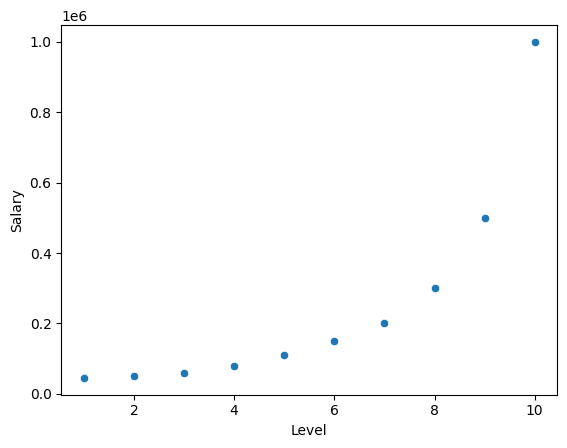

In [6]:
sns.scatterplot(data=data,x='Level',y='Salary')
plt.show()

In [7]:
X=data[['Level']]
Y=data['Salary']
X.shape

(10, 1)

In [8]:
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(X)

In [9]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_squared_error

In [10]:
score=cross_val_score(LinearRegression(),X=x_poly,y=Y,cv=5,
                      scoring='neg_mean_squared_error')
print(score)
print(score.mean())

[-1.07887783e+11 -3.64244015e+08 -1.49312259e+08 -1.33587531e+09
 -4.91434462e+10]
-31776132241.44624


<Axes: ylabel='Salary'>

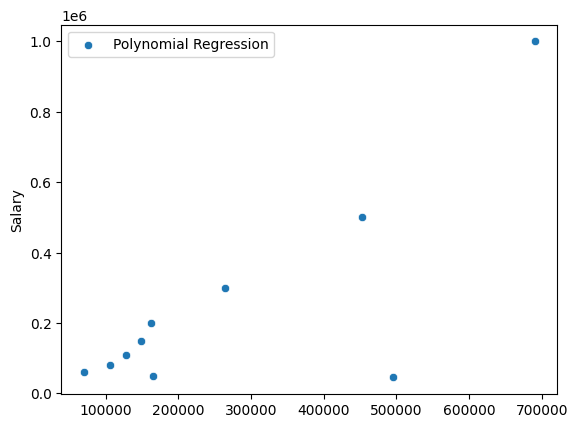

In [11]:
y_pred=cross_val_predict(LinearRegression(),X=x_poly,y=Y,cv=5)
sns.scatterplot(x=y_pred,y=Y,label='Polynomial Regression')

In [12]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(Y,y_pred)
print(r2)
mse=mean_squared_error(Y,y_pred)
print(mse)

0.6060594362115332
31776132241.446247


In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(X)
poly=PolynomialFeatures(degree=4)
x_Poly=poly.fit_transform(x_scaled)
lin_model=LinearRegression()
lin_model.fit(x_poly,Y)
y_pred=lin_model.predict(x_poly)
r2=r2_score(Y,y_pred)
print(r2)

0.9973922891706614
